In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats
from colorama import Fore, Style

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)

In [2]:
# Place where data is
#===================================================

#os.chdir(r'C:\Users\Usuario\Desktop\Python\Data\kaggle\Car Price Prediction')

In [3]:
# Upload the data
#===================================================

df = pd.read_csv('carprice.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Replace "?" for NaN
#==================================================

def check_question_marck(df):
    
    for column in df.columns:
        
        df[column] = df[column].replace('?', np.nan)
    
    return df

check_question_marck(df)

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
195,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
197,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [5]:
# Shape
#=============================================

df.shape

(199, 26)

# Information about features

   **Simbololing** = risk index. Higher values means riskier car (+3). Price is influenced by this index
   
   **normalized losses** = is the relative average loss payment per insured vehicle year. This figure is normalised for all
     vehicles within a given size category (two-door, small, station wagons, sports/specialty, etc…) and represents the average
     loss per vehicle per year
     
   **the rest of features** = characteristics of engine size ($in^3$), wheelbase ($in$), numbers of cylinders, curb weight 
   (weight without passangers), etc.

In [6]:
# Renaming columns
#================================================

df.columns = df.columns.str.replace('-', '_')   
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [7]:
# dtypes
#================================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized_losses  160 non-null    object 
 2   make               199 non-null    object 
 3   fuel_type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num_of_doors       197 non-null    object 
 6   body_style         199 non-null    object 
 7   drive_wheels       199 non-null    object 
 8   engine_location    199 non-null    object 
 9   wheel_base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb_weight        199 non-null    int64  
 14  engine_type        199 non-null    object 
 15  num_of_cylinders   199 non-null    object 
 16  engine_size        199 non

In [8]:
# Convert 'normalized_losses' and 'prices' to floats values
#==========================================================

col_to_apply = ['normalized_losses', 'price']

for column in col_to_apply:
        
    df[column] = df[column].astype(float)
        
    print(f'{column} is {df[column].apply(type).unique()}')

normalized_losses is [<class 'float'>]
price is [<class 'float'>]


In [9]:
# Dtypes 
#======================================================

df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower             int64
peak_rpm               int64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [10]:
# Summary statistics
#===================================================

df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,199.000000,160.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,195.000000
mean,0.788945,121.300000,98.852764,174.099497,65.905528,53.816583,2558.829146,127.949749,3.328442,3.248945,10.171960,104.150754,5107.788945,25.412060,30.904523,13248.015385
std,1.220895,35.602417,6.085940,12.489391,2.176300,2.395002,528.005482,41.534670,0.274602,0.311583,4.027676,40.051827,467.587982,6.523544,6.900880,8056.330093
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.000000,52.000000,2142.500000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7756.500000
50%,1.000000,114.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,25.000000,30.000000,10245.000000
75%,2.000000,148.000000,102.400000,183.500000,66.900000,55.550000,2953.000000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,36.000000,16509.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
# Duplicated values?
#=====================================================

df.loc[df.duplicated()]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [12]:
# NaN values?
#=====================================================

df.isna().sum()

symboling             0
normalized_losses    39
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  0
stroke                0
compression_ratio     0
horsepower            0
peak_rpm              0
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [13]:
# Fix alfa-romero with alfa-romeo (real name) and capitalize names
#=================================================================

df.make = df.make.replace('alfa-romero', 'alfa-romeo')
df.make = df.make.apply(lambda x: x.title())

# A general view

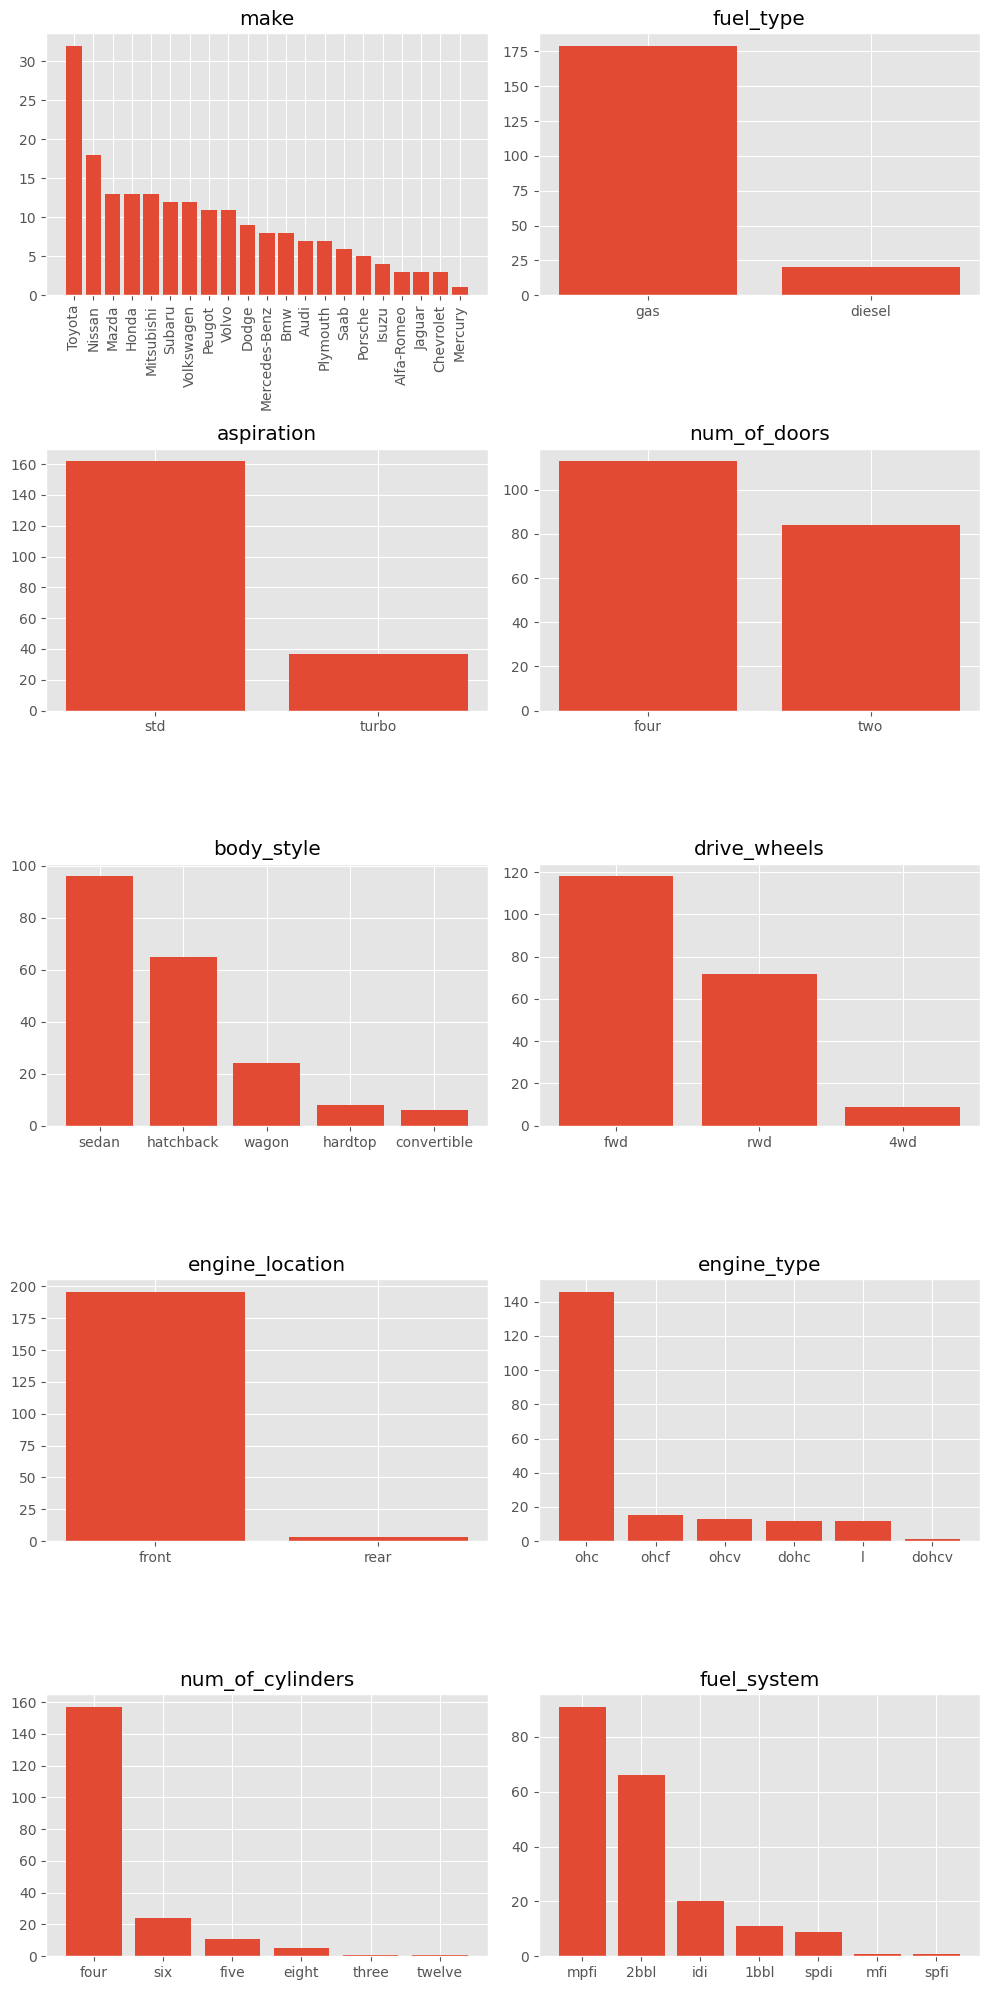

In [14]:
# Bar plot for categorical variables
#===================================================

fig, ax = plt.subplots(
        figsize = (10, 20),
        nrows = 5,
        ncols = 2
)

current_ax = 0

for column_name, column_array in df.items():
    
    if column_array.dtype == object and column_name == 'make':
        
        ax = fig.axes[current_ax]
        size = df[column_name].value_counts()
        ax.bar(x = size.index, height = size)
        ax.set_xticklabels(size.index, rotation = 90)  
        ax.set_title(column_name)
        
    elif column_array.dtype == object:
        
        ax = fig.axes[current_ax]
        size = df[column_name].value_counts()
        ax.bar(x = size.index, height = size)   
        ax.set_title(column_name)
        
    else: 
        
        continue

    current_ax += 1

plt.tight_layout()
plt.show()

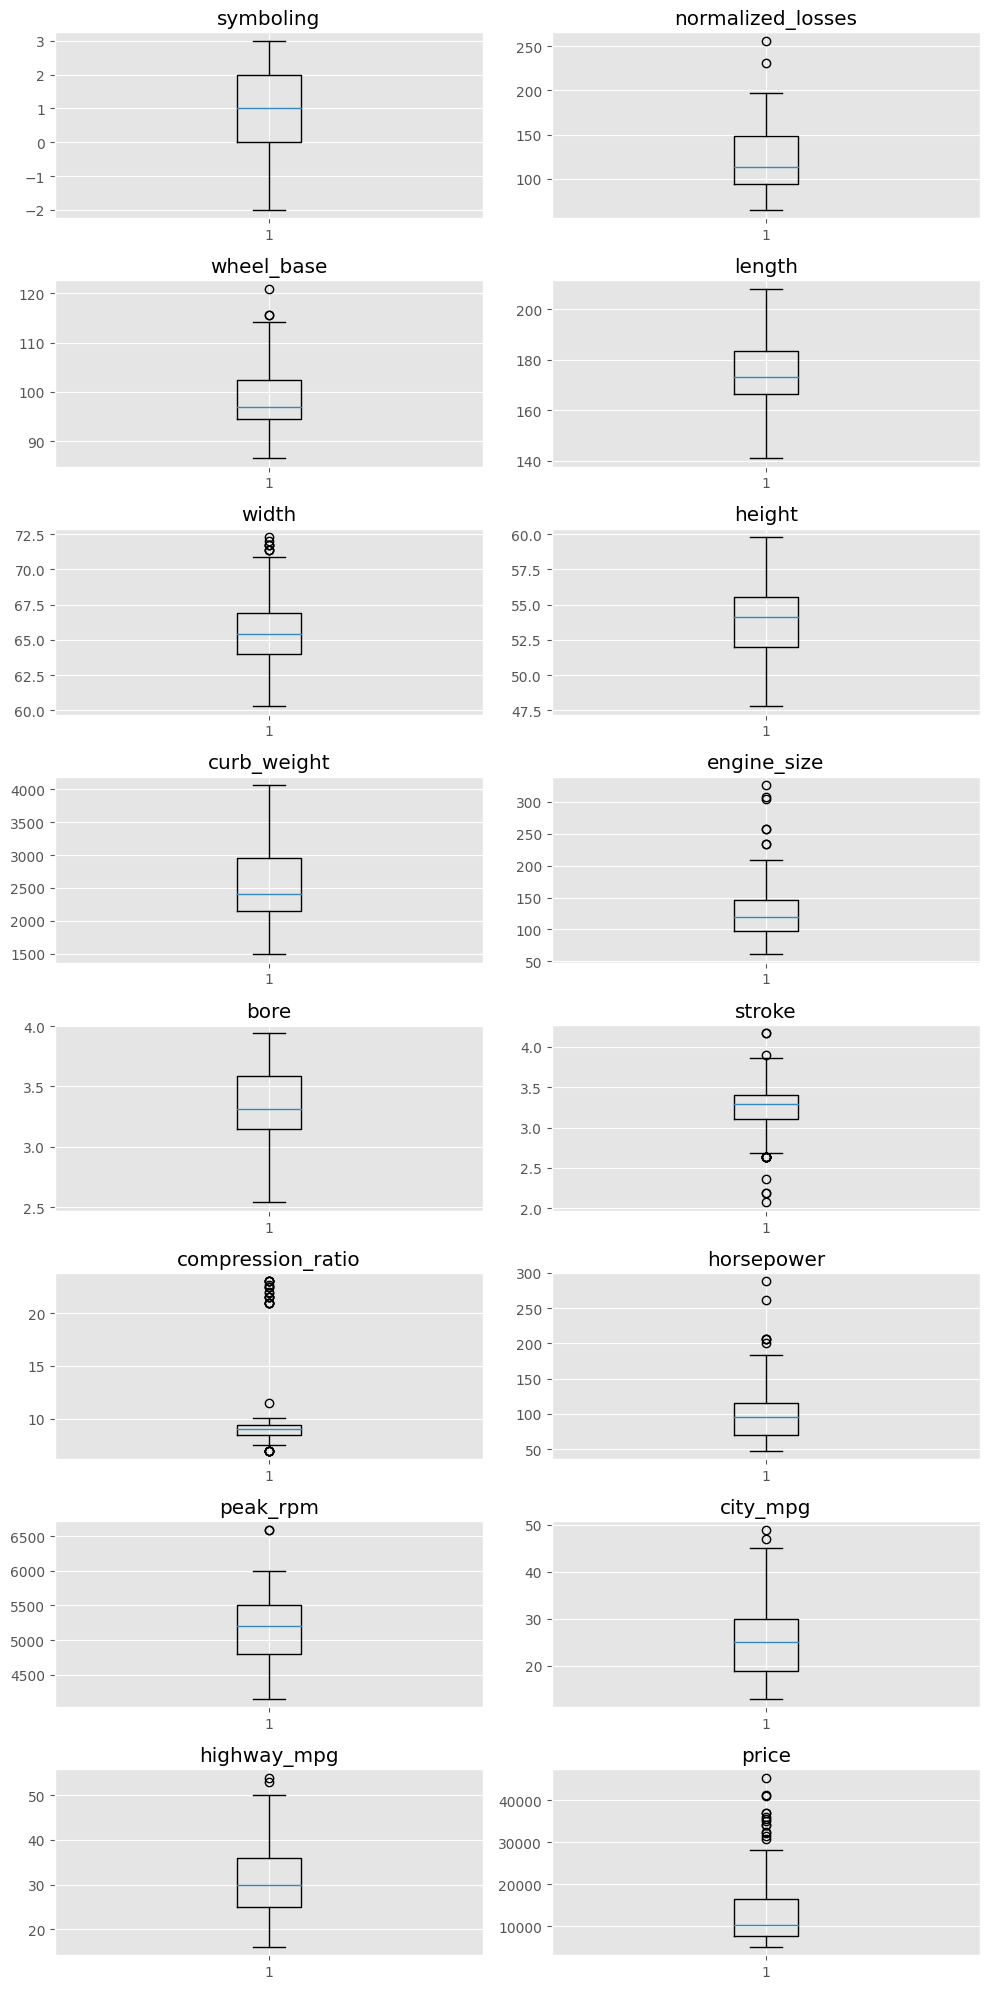

In [15]:
# Boxplot for numerical values
#=============================================

fig, axs = plt.subplots(
    nrows = 8, 
    ncols = 2, 
    figsize = (10, 20)
)

current_ax = 0

for column_name, column_array in df.items():
    
    if column_array.dtype != object:
        
        ax = fig.axes[current_ax]
        ax.boxplot(column_array.dropna())
        ax.set_title(column_name)
        
    else:
        
        continue
        
    current_ax += 1
    
plt.tight_layout()
plt.show()

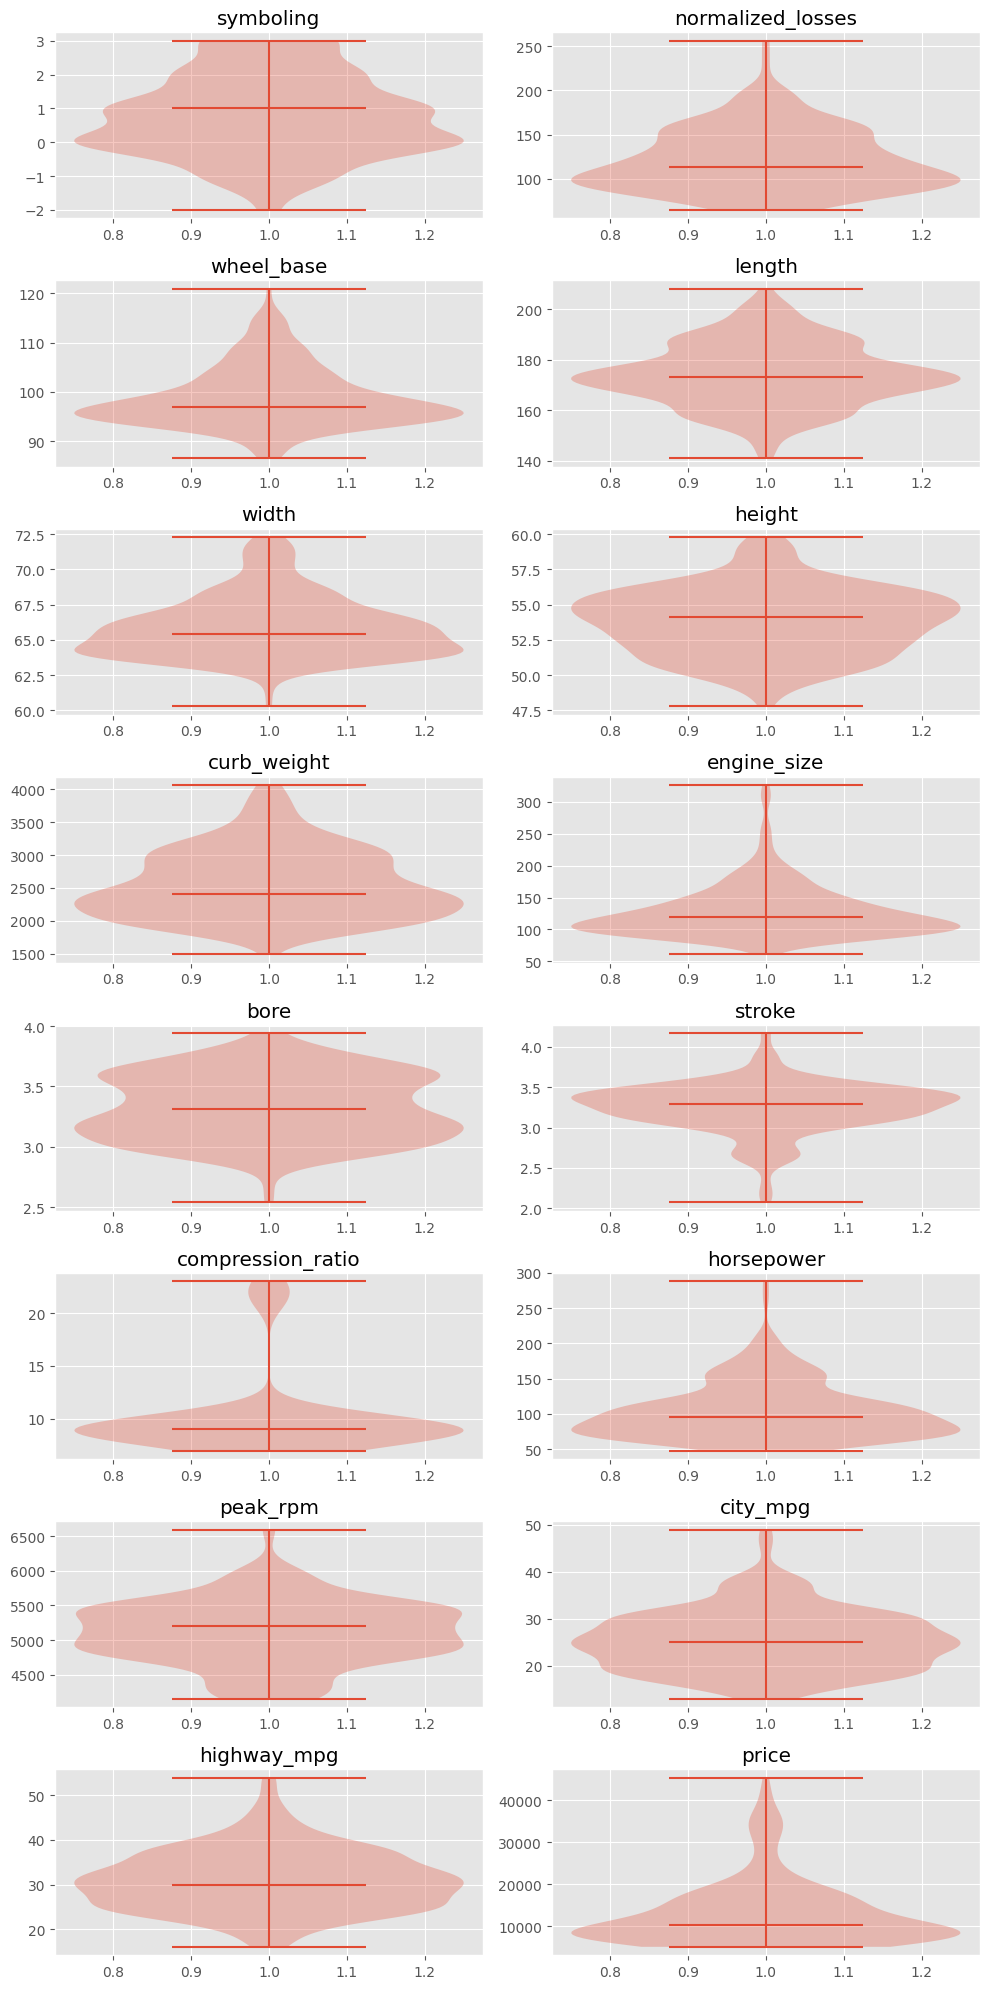

In [16]:
# Violinplot for numerical values
#==========================================================

fig, axs = plt.subplots(
    nrows = 8, 
    ncols = 2, 
    figsize = (10, 20)
)

current_ax = 0

for column_name, column_array in df.items():
    
    if column_array.dtype != object:
        
        ax = fig.axes[current_ax]
        ax.violinplot(column_array.dropna(), showmedians = True)
        ax.set_title(column_name)
        
    else:
        continue
        
    current_ax += 1
    
plt.tight_layout()
plt.show()

# Plots by brand

In [17]:
# Example
#==========================================================

list_to_plot = [df[df['make'] == i]['compression_ratio'].dropna() for i in df.make.unique()]

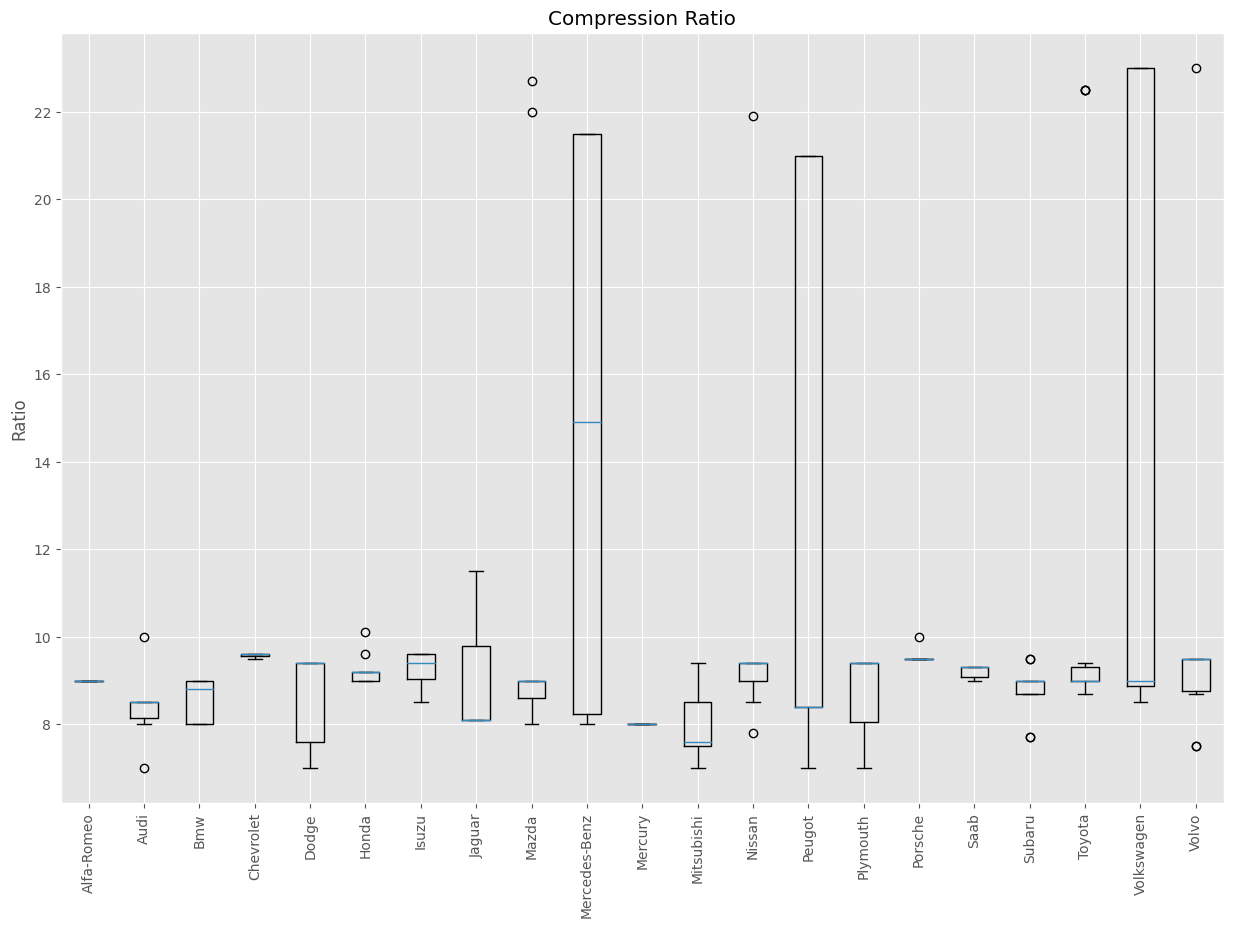

In [18]:
#Example
#==========================================================

fig, ax = plt.subplots(figsize = (15, 10))

ax.boxplot(list_to_plot)
ax.set_xticklabels(df.make.unique(), rotation = 90)
ax.set_ylabel('Ratio')
ax.set_title('Compression Ratio')

plt.show()

In [19]:
# Let's gather all the information by brands in a dictionary
#============================================================

cars_dict = {}

for column_name, column_array in df.items():
    
    if column_array.dtype != object:
        
        list_to_plot = [df[df['make'] == i][column_name].dropna() for i in df.make.unique()]
    
        cars_dict[column_name] = list_to_plot

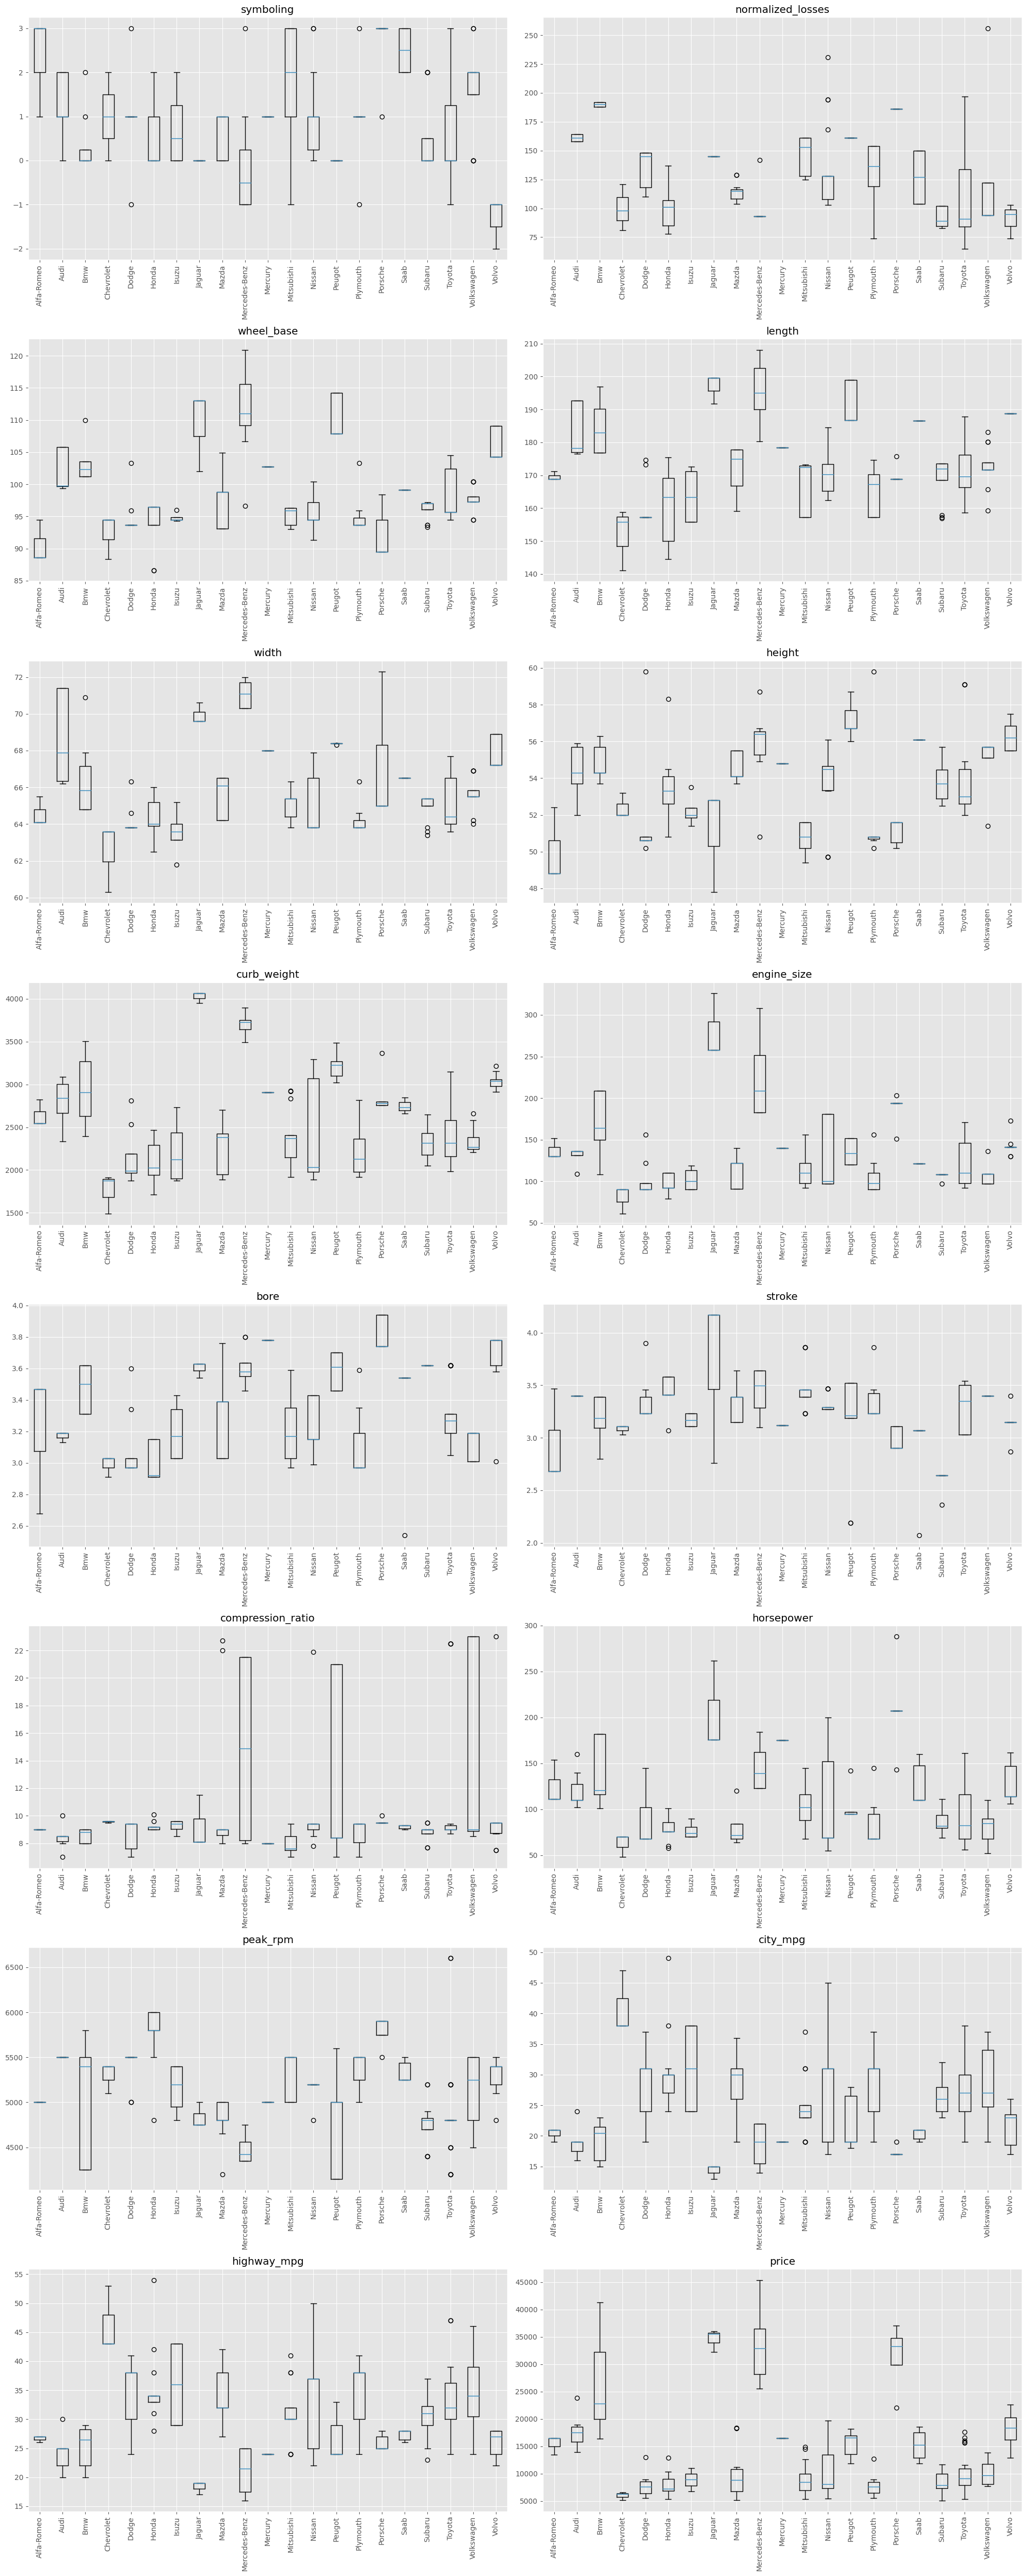

In [20]:
# Plot Boxplot by brand and features
#==========================================================

fig, axs = plt.subplots(8, 2, figsize = (20, 50))

current_ax = 0

for column_name, column_array in df.items():
    
    if column_array.dtype != object:
        
        ax = fig.axes[current_ax]
        ax.boxplot(cars_dict[column_name])
        ax.set_xticklabels(df.make.unique(), rotation = 90)
        ax.set_title(column_name)
    
    else:
        continue

    current_ax += 1
    
plt.tight_layout()
plt.show()

# Fitting a model

In [21]:
# Selecting target and feature vector
#---------------------------------------

df.dropna(inplace = True)
df = pd.get_dummies(df, drop_first = True, dtype = float)
target = df.price
feature_vector = df.drop('price', axis = 1).copy()

In [22]:
# Correlation matrix
#==================================================

df.corr()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,...,drive_wheels_fwd,drive_wheels_rwd,engine_type_l,engine_type_ohc,engine_type_ohcf,engine_type_ohcv,num_of_cylinders_five,num_of_cylinders_four,num_of_cylinders_six,num_of_cylinders_three,fuel_system_2bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi
symboling,1.000000,0.518344,-0.520591,-0.336257,-0.219186,-0.475185,-0.251880,-0.109453,-0.256469,-0.021285,-0.138316,-0.003949,0.199106,0.089550,0.149830,...,0.186876,-0.173173,-0.094028,-0.031708,-0.056658,0.075314,-0.106998,0.013899,-0.005634,0.084561,0.039371,-0.163505,0.151452,0.031332,0.040020
normalized_losses,0.518344,1.000000,-0.060086,0.035541,0.109726,-0.413702,0.125858,0.207820,-0.031558,0.063330,-0.127259,0.290511,0.237697,-0.235523,-0.188564,...,-0.256671,0.336782,0.225828,-0.174743,-0.232196,0.186968,0.003516,-0.244995,0.288623,-0.000296,-0.142310,-0.110178,0.053429,0.233676,0.090593
wheel_base,-0.520591,-0.060086,1.000000,0.871534,0.814991,0.555767,0.810181,0.649206,0.578159,0.167449,0.291431,0.516948,-0.289234,-0.580657,-0.611750,...,-0.538664,0.600860,0.322210,-0.173848,-0.115877,0.014449,0.389531,-0.364894,0.220615,-0.152345,-0.459666,0.339752,-0.036513,0.419498,-0.109983
length,-0.336257,0.035541,0.871534,1.000000,0.838338,0.499251,0.871291,0.725953,0.646318,0.121073,0.184814,0.672063,-0.234074,-0.724544,-0.724599,...,-0.517313,0.558174,0.172050,-0.225416,-0.088436,0.151761,0.338955,-0.383195,0.275542,-0.216873,-0.483221,0.230757,0.005445,0.545299,-0.093080
width,-0.219186,0.109726,0.814991,0.838338,1.000000,0.292706,0.870595,0.779253,0.572554,0.196619,0.258752,0.681872,-0.232216,-0.666684,-0.693339,...,-0.506061,0.570400,0.209513,-0.244782,-0.096753,0.262856,0.513866,-0.513139,0.269691,-0.217457,-0.526301,0.312339,0.028371,0.467067,-0.078649
height,-0.475185,-0.413702,0.555767,0.499251,0.292706,1.000000,0.367052,0.111083,0.254836,-0.091313,0.233308,0.034317,-0.245864,-0.199737,-0.226136,...,-0.195151,0.109342,0.231600,-0.026729,-0.018870,-0.120793,0.203390,-0.019879,-0.085293,-0.024601,-0.147031,0.245546,-0.130131,0.141426,-0.243746
curb_weight,-0.251880,0.125858,0.810181,0.871291,0.870595,0.367052,1.000000,0.888626,0.645792,0.173844,0.224724,0.790095,-0.259988,-0.762155,-0.789338,...,-0.672954,0.681483,0.227569,-0.362509,-0.086167,0.347825,0.386450,-0.578496,0.426738,-0.161147,-0.567896,0.287617,0.057935,0.530560,-0.064262
engine_size,-0.109453,0.207820,0.649206,0.725953,0.779253,0.111083,0.888626,1.000000,0.595737,0.299683,0.141097,0.812073,-0.284686,-0.699139,-0.714095,...,-0.577214,0.645703,0.054188,-0.349331,-0.114259,0.510900,0.303305,-0.701183,0.609479,-0.152553,-0.502771,0.190333,0.096347,0.503662,-0.083234
bore,-0.256469,-0.031558,0.578159,0.646318,0.572554,0.254836,0.645792,0.595737,1.000000,-0.102581,0.015119,0.560239,-0.312269,-0.590440,-0.590850,...,-0.596667,0.571695,0.172634,-0.409143,0.342945,0.131608,0.083877,-0.102459,0.085637,-0.116463,-0.321252,0.061210,0.089521,0.474115,-0.125847
stroke,-0.021285,0.063330,0.167449,0.121073,0.196619,-0.091313,0.173844,0.299683,-0.102581,1.000000,0.243587,0.148804,-0.011312,-0.020055,-0.012934,...,0.089588,0.058876,-0.050976,0.389995,-0.602305,-0.029443,0.219586,-0.179062,0.089174,-0.055846,-0.241469,0.270438,0.179607,-0.090158,0.119926


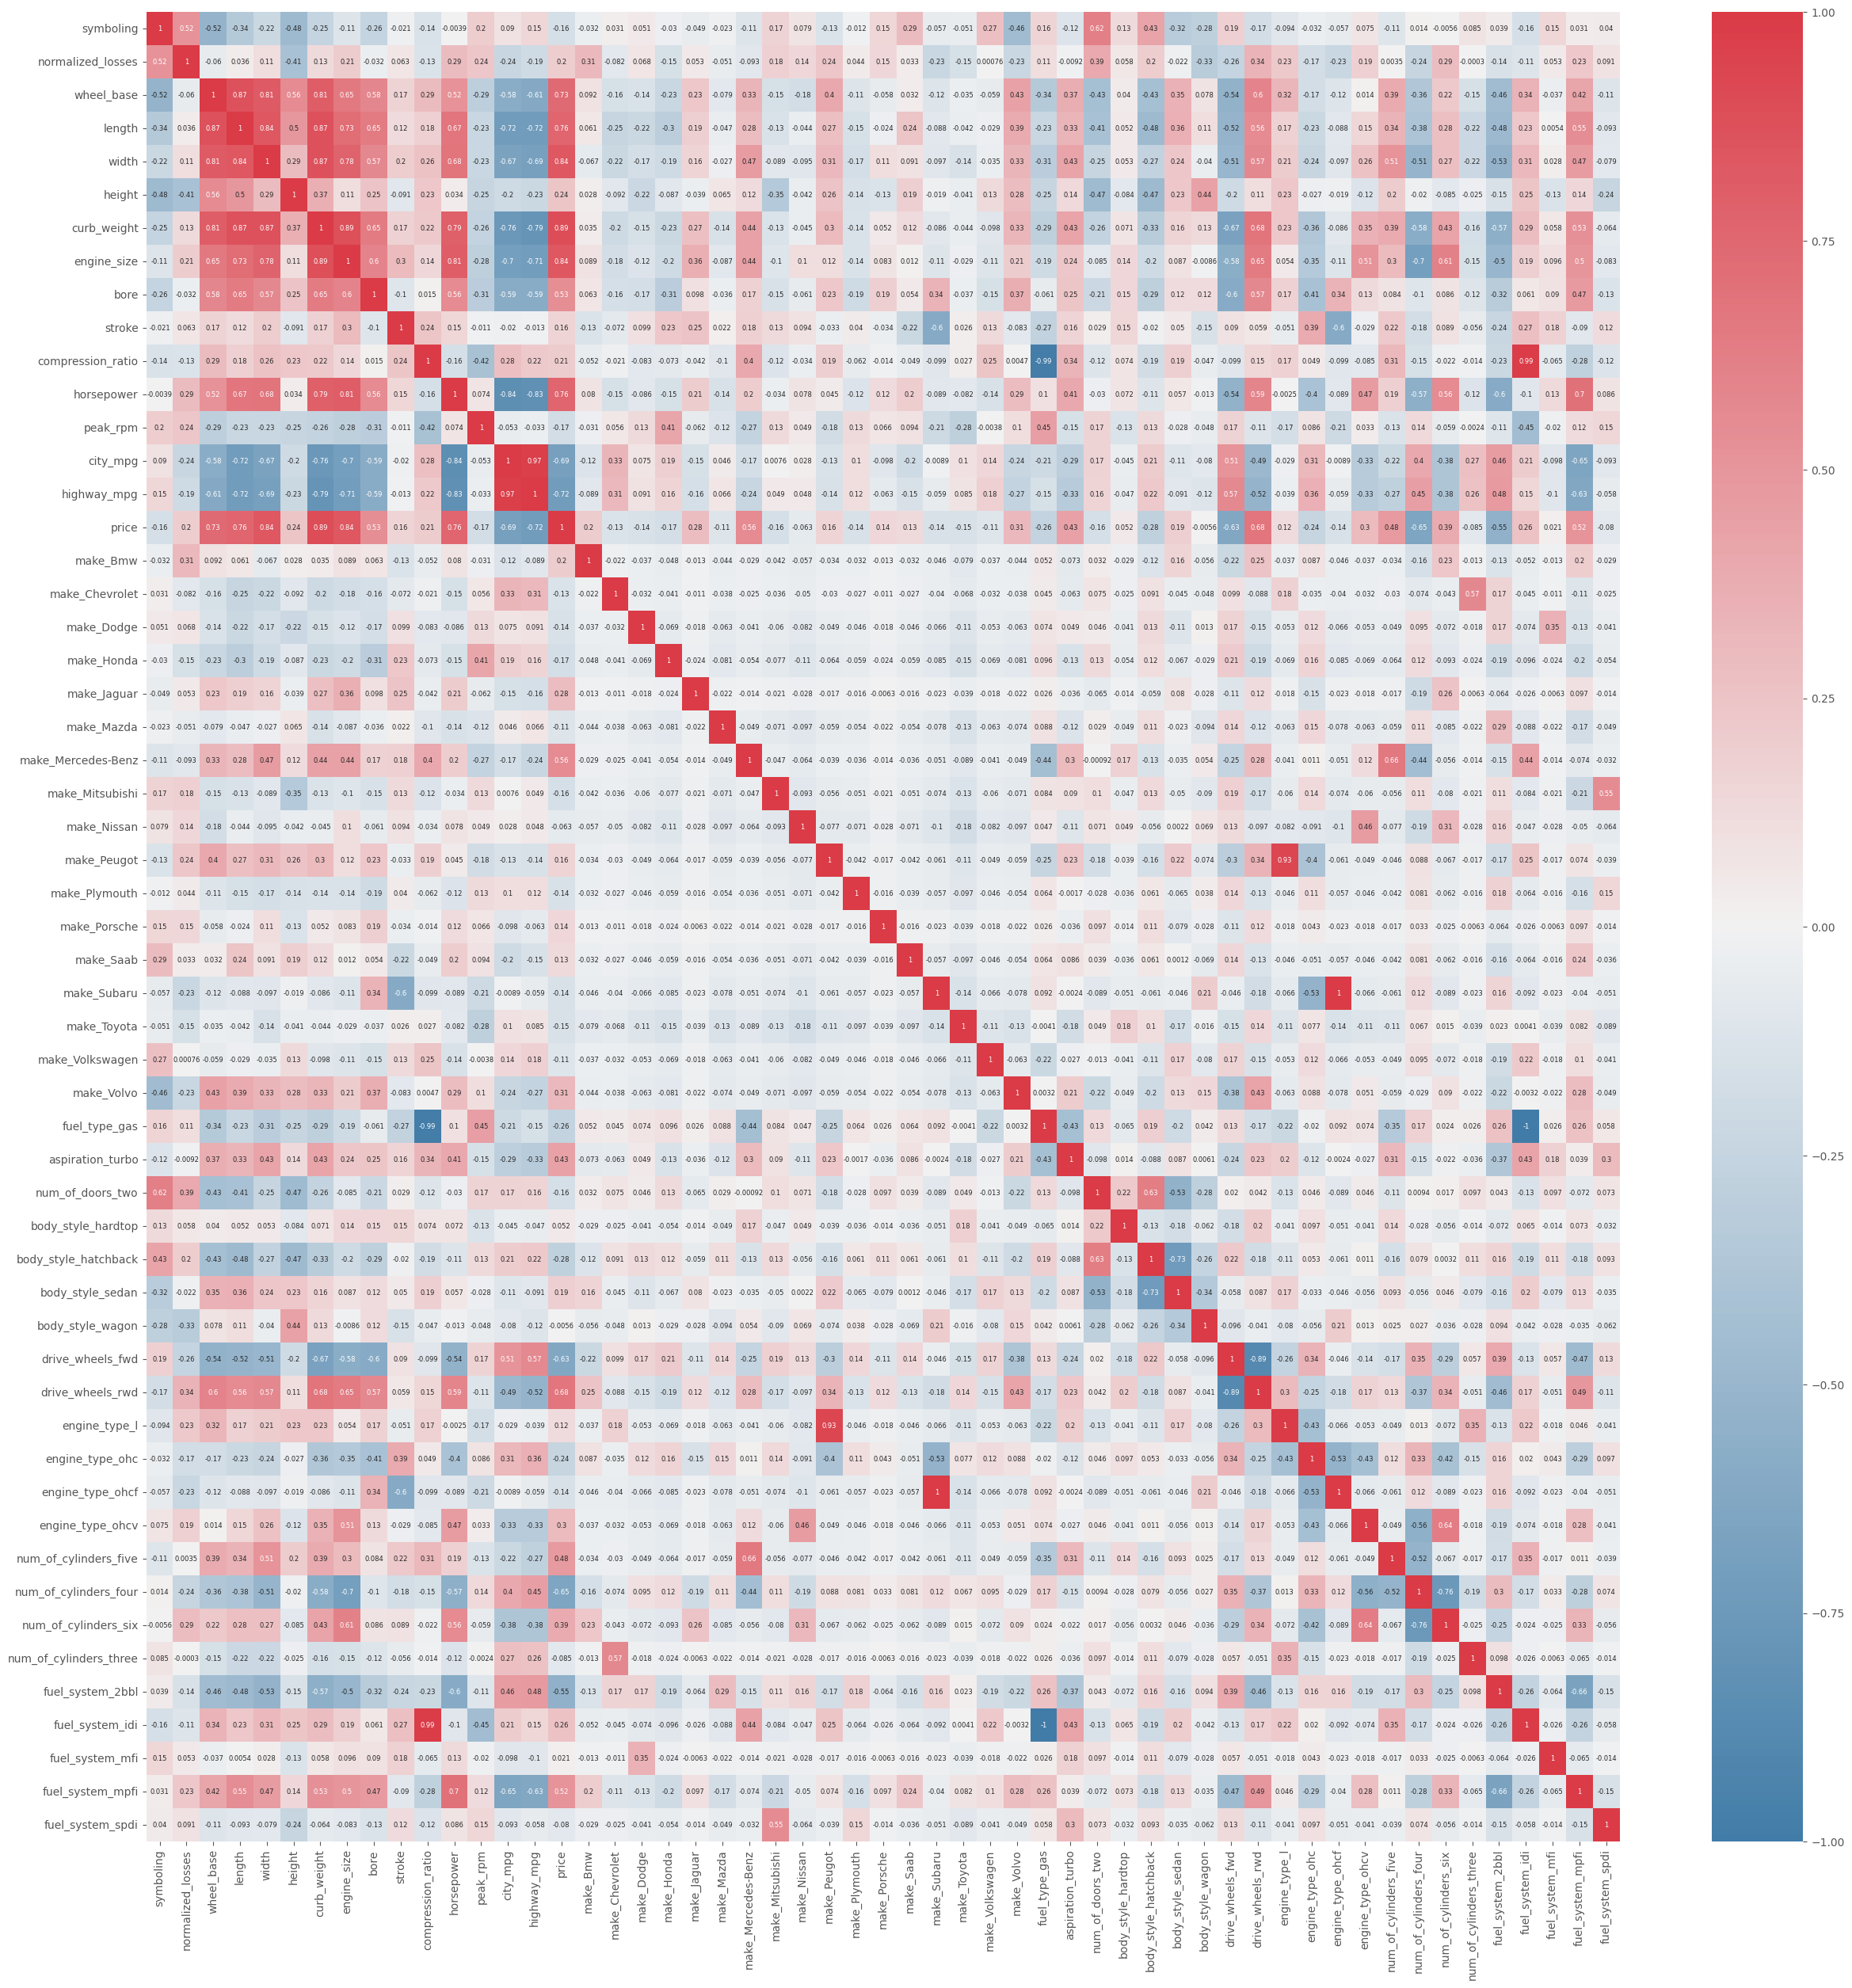

In [23]:
# Heatmap for correlation matrix
#=====================================================

fig, ax = plt.subplots(figsize = (30, 30))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(df.corr(), vmax = 1, vmin = -1, cmap = cmap, annot = True, annot_kws = {"fontsize": 6})
plt.show()

In [24]:
# Split the data
#----------------------------------------

X_train, X_test, y_train, y_test = train_test_split(feature_vector, target, test_size = .2, random_state = 46)

In [25]:
# Add a constant to X's
#----------------------------------------

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [26]:
# Create the model
#----------------------------------------

lin_reg = sm.OLS(y_train, X_train)
model = lin_reg.fit()

In [27]:
# Model summary
#----------------------------------------

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     80.15
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           1.63e-50
Time:                        19:40:32   Log-Likelihood:                -1028.6
No. Observations:                 127   AIC:                             2155.
Df Residuals:                      78   BIC:                             2295.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   7980.0094   8558.567      0.932      0.354   -9058.790     2.5e+04
symboling                 91.8509    229.075      0.401      0.690    -364.203     547.905
normalized_losses          7.0946      6.456      1.099      0.275      -5.757      19.947
wheel_base               175.4358    103.206      1.700      0.093     -30.031     380.902
length                   -10.4194     41.392     -0.252      0.802     -92.825      71.986
width                    122.1812    217.967      0.561      0.577    -311.758     556.120
height                  -387.2375    134.718     -2.874      0.005    -655.440    -119.035
curb_weight                5.7843      1.400      4.131      0.000       2.997       8.572
engine_size              -12.6991     24.292     -0.523      0.603     -61.060      35.662
bore                   -3669.8600   1515.004     -2.422      0.018   -6686.001    -653.719
stroke                  1599.5269   1034.143      1.547      0.126    -459.293    3658.347
compression_ratio        112.0771    405.251      0.277      0.783    -694.715     918.869
horsepower                -8.6986     18.969     -0.459      0.648     -46.462      29.065
peak_rpm                  -0.7689      0.558     -1.379      0.172      -1.879       0.341
city_mpg                -117.4117    108.462     -1.083      0.282    -333.343      98.520
highway_mpg               60.3568     92.198      0.655      0.515    -123.196     243.910
make_Bmw                5253.0645   1948.123      2.696      0.009    1374.649    9131.480
make_Chevrolet         -3092.6593   1924.526     -1.607      0.112   -6924.097     738.778
make_Dodge             -5381.2195   1578.016     -3.410      0.001   -8522.807   -2239.632
make_Honda             -1621.0971   1623.252     -0.999      0.321   -4852.743    1610.549
make_Jaguar             5345.1279   2888.266      1.851      0.068    -404.969    1.11e+04
make_Mazda             -3140.8329   1476.657     -2.127      0.037   -6080.632    -201.034
make_Mercedes-Benz      5624.8966   1774.204      3.170      0.002    2092.727    9157.066
make_Mitsubishi        -5585.3435   1530.257     -3.650      0.000   -8631.852   -2538.835
make_Nissan            -2462.0643   1395.083     -1.765      0.082   -5239.461     315.333
make_Peugot            -1801.7630   1269.295     -1.419      0.160   -4328.735     725.209
make_Plymouth          -5385.5845   1698.960     -3.170      0.002   -8767.955   -2003.214
make_Porsche            7.791e-12   7.69e-12      1.013      0.314   -7.52e-12    2.31e-11
make_Saab                124.2571   1542.368      0.081      0.936   -2946.362    3194.876
make_Subaru            -1891.7892   1176.441     -1.608      0.112   -4233.903     450.324
make_Toyota            -3760.2627   1547.831     -2.429      0.017   -6841.757  

In [28]:
# Normalcy tests
#--------------------------------------

def testing_plot_normalcy(model):
    
    ax = model.resid.hist()
    ax.set_title('Normalcy in errors')
    plt.show()

def testing_Anderson_Darling(model):
    
    for i in range(len(stats.anderson(model.resid)[1])):
        statistic = stats.anderson(model.resid)[0]
        alpha = stats.anderson(model.resid)[2][i]
    
        if statistic < stats.anderson(model.resid)[1][i]:
            print(Fore.BLUE +
              f'{i + 1}. Accept the null hypothesis H\u2092. \nStatistic = {statistic:.2f} < {stats.anderson(model.resid)[1][i]} for \u03B1 = {alpha}'
              + Style.RESET_ALL)
        else:
            print(Fore.RED +
              f'{i + 1}. Reject the null hypothesis H\u2092. \nStatistic = {statistic:.2f} > {stats.anderson(model.resid)[1][i]} for \u03B1 = {alpha}'
              + Style.RESET_ALL) 
            
def testing_Shapiro_Wilk(model):
    
    p_value = stats.shapiro(model.resid)[1]
    
    if stats.shapiro(model.resid)[1] > 0.05:
        print(Fore.BLUE +
              f'1. Accept the null hypothesis H\u2092. \nP-value = {p_value:.4f} > 0.05'
              + Style.RESET_ALL)
    
    elif stats.shapiro(model.resid)[1] < 0.05 and stats.shapiro(model.resid)[1] > 0.01:
        print(Fore.BLUE +
              f'1. Accept the null hypothesis H\u2092. \nP-value = {p_value:.4f} > 0.01'
              + Style.RESET_ALL)
    
    else:
        print(Fore.RED +
              f'1. Reject the null hypothesis H\u2092. \nP-value = {p_value:.4f} < 0.01'
              + Style.RESET_ALL)
        
def testing_plot_qq(model):
    
    sm.qqplot(model.resid, line = 's')
    

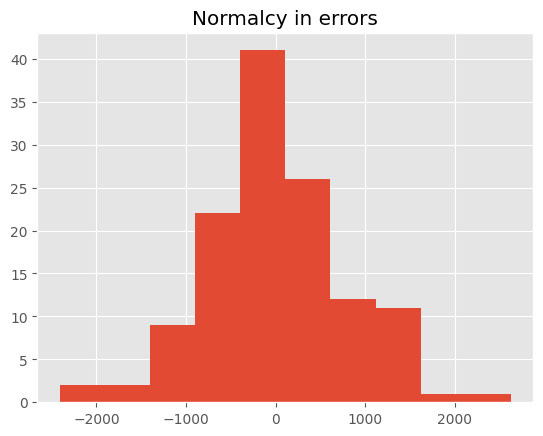

In [29]:
testing_plot_normalcy(model)

In [30]:
testing_Anderson_Darling(model)

1. Reject the null hypothesis Hₒ. 
Statistic = 0.69 > 0.559 for α = 15.0
2. Reject the null hypothesis Hₒ. 
Statistic = 0.69 > 0.637 for α = 10.0
3. Accept the null hypothesis Hₒ. 
Statistic = 0.69 < 0.764 for α = 5.0
4. Accept the null hypothesis Hₒ. 
Statistic = 0.69 < 0.891 for α = 2.5
5. Accept the null hypothesis Hₒ. 
Statistic = 0.69 < 1.06 for α = 1.0


In [31]:
testing_Shapiro_Wilk(model)

1. Accept the null hypothesis Hₒ. 
P-value = 0.1380 > 0.05


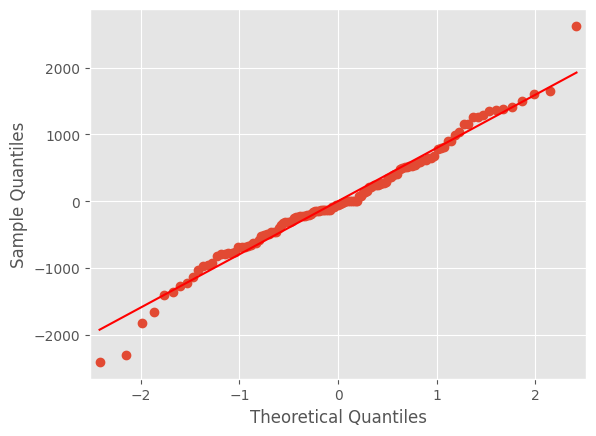

In [32]:
testing_plot_qq(model)

In [33]:
# Homoscedasticity or Heteroscedasticity?
#============================================================

def computing_ajusted_values(X_train, model):
    
    params = np.array(model.params).reshape(len(model.params), 1)
    matrix = np.array(X_train)
    ajusted_values = np.dot(params.T, matrix.T)
    return ajusted_values
    

def testing_plot_equal_variance(ajusted_values, model):
    
    fig, ax = plt.subplots()

    ax.scatter(ajusted_values, model.resid)
    ax.axhline(0, color = 'blue', linestyle = '--')
    ax.set_xlabel('$\hat{Y}$')
    ax.set_ylabel('$e = Y - \hat{Y}$')

    plt.show()
    
def testing_Breusch_Pagan(model, lin_reg):
    
    bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, lin_reg.exog)
    
    p_value = bp_test[1]
    
    if p_value > 0.05:
        print(Fore.BLUE +
              f'1. Accept the null hypothesis H\u2092 = Homoscedasticity. \nP-value = {p_value:.4f} > 0.05'
              + Style.RESET_ALL)
    
    elif p_value < 0.05 and p_value > 0.01:
        print(Fore.BLUE +
              f'1. Accept the null hypothesis H\u2092 = Homoscedasticity. \nP-value = {p_value:.4f} > 0.01'
              + Style.RESET_ALL)
    
    else:
        print(Fore.RED +
              f'1. Reject the null hypothesis H\u2092 = Homoscedasticity. \nP-value = {p_value:.4f} < 0.01'
              + Style.RESET_ALL)
    

In [34]:
ajusted_values = computing_ajusted_values(X_train, model)

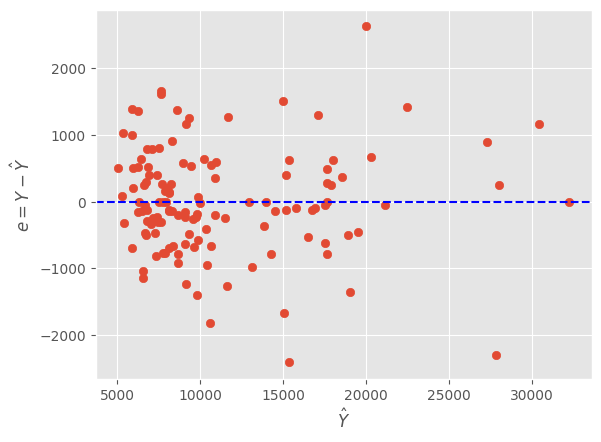

In [35]:
testing_plot_equal_variance(ajusted_values, model)

In [36]:
testing_Breusch_Pagan(model, lin_reg)

1. Accept the null hypothesis Hₒ = Homoscedasticity. 
P-value = 0.4795 > 0.05


In [37]:
# Computing errors metrics
#--------------------------------------------

def computing_RMSE(y_test, model):
    
    params = np.array(model.params).reshape(len(model.params), 1)
    matrix = np.array(X_test)
    ajusted_values = pd.Series(np.dot(params.T, matrix.T).flatten())
    
    RMSE = np.sqrt(mean_squared_error(y_test, ajusted_values))
    
    print(f'The RMSE is: {RMSE:.2f}')
    
def computing_MAPE(y_test, model):
    
    params = np.array(model.params).reshape(len(model.params), 1)
    matrix = np.array(X_test)
    ajusted_values = pd.Series(np.dot(params.T, matrix.T).flatten())
    
    MAPE = np.mean(np.abs((y_test - ajusted_values) / y_test)) * 100
    
    print(f'The MAPE is: {MAPE:.2f}')

In [38]:
computing_RMSE(y_test, model)

The RMSE is: 2797.69


In [39]:
computing_MAPE(y_test, model)

The MAPE is: 18.36


# Feature Selection

In [40]:
# Stepwise selection. Backward selection
#--------------------------------------------------

while True:
    
    p_value = model.pvalues[1:]
    max_pvalue = p_value.max()
    
    if max_pvalue > 0.05:
        
        max_idx = p_value.idxmax()
        feature_vector = feature_vector.drop(max_idx, axis = 1)
        X_train, X_test, y_train, y_test = train_test_split(feature_vector, target, test_size = .2, random_state = 46)
        X_train = sm.add_constant(X_train)
        X_test = sm.add_constant(X_test)
        lin_reg = sm.OLS(y_train, X_train)
        model = lin_reg.fit()
    
    else:
        
        break

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     149.9
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           2.22e-68
Time:                        19:40:33   Log-Likelihood:                -1037.4
No. Observations:                 127   AIC:                             2133.
Df Residuals:                      98   BIC:                             2215.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   9986.2110   3343.731      2.987      0.004    3350.686    1.66e+04
wheel_base               219.0487     50.816      4.311      0.000     118.206     319.892
height                  -503.9803     89.313     -5.643      0.000    -681.219    -326.742
curb_weight                5.8288      0.712      8.189      0.000       4.416       7.241
bore                   -3472.9234    928.143     -3.742      0.000   -5314.794   -1631.053
stroke                  1473.9334    666.290      2.212      0.029     151.702    2796.165
make_Bmw                4829.6404    868.999      5.558      0.000    3105.141    6554.140
make_Chevrolet         -5229.7990   1159.737     -4.509      0.000   -7531.259   -2928.339
make_Dodge             -6573.1991    834.004     -7.881      0.000   -8228.252   -4918.146
make_Honda             -4519.8165    793.911     -5.693      0.000   -6095.307   -2944.326
make_Jaguar             3724.6619   1410.119      2.641      0.010     926.326    6522.998
make_Mazda             -4157.1374    651.900     -6.377      0.000   -5450.811   -2863.463
make_Mercedes-Benz      4999.6994    935.664      5.343      0.000    3142.905    6856.493
make_Mitsubishi        -7280.5750    763.112     -9.541      0.000   -8794.946   -5766.205
make_Nissan            -3826.1023    643.943     -5.942      0.000   -5103.986   -2548.219
make_Peugot            -1459.4786    375.447     -3.887      0.000   -2204.540    -714.417
make_Plymouth          -6888.7541   1006.458     -6.845      0.000   -8886.038   -4891.470
make_Subaru            -2056.8143    381.424     -5.392      0.000   -2813.737   -1299.892
make_Toyota            -4625.5568    516.703     -8.952      0.000   -5650.938   -3600.176
make_Volkswagen        -3991.4940    675.920     -5.905      0.000   -5332.836   -2650.152
fuel_type_gas           5697.9335   1684.710      3.382      0.001    2354.682    9041.185
aspiration_turbo        2015.2564    329.385      6.118      0.000    1361.603    2668.909
body_style_hardtop     -5658.1155   1114.383     -5.077      0.000   -7869.572   -3446.659
body_style_hatchback   -5476.1380   1078.896     -5.076      0.000   -7617.172   -3335.104
body_style_sedan       -5251.6392   1083.373     -4.847      0.000   -7401.557   -3101.721
body_style_wagon       -5527.1072   1105.517     -5.000      0.000   -7720.971   -3333.244
engine_type_l          -1459.4786    375.447     -3.887      0.000   -2204.540    -714.417
engine_type_ohc        -1355.0713    528.003     -2.566      0.012   -2402.875    -307.267
engine_type_ohcf       -2056.8143    381.424     -5.392      0.000   -2813.737   -1299.892
num_of_cylinders_five   4080.5833   1167.379      3.496      0.001    1763.957    6397.210
num_of_cylinders_four   3194.6026   1236.932      2.583      0.011     739.951  

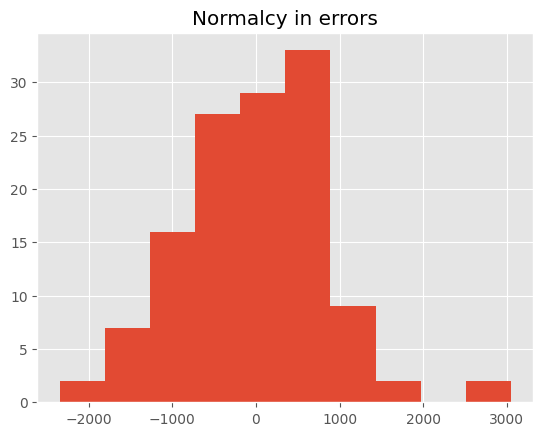

In [42]:
testing_plot_normalcy(model)

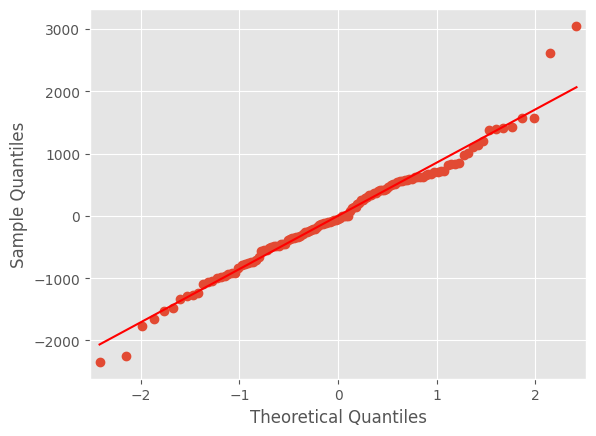

In [43]:
testing_plot_qq(model)

In [44]:
testing_Anderson_Darling(model)

1. Accept the null hypothesis Hₒ. 
Statistic = 0.44 < 0.559 for α = 15.0
2. Accept the null hypothesis Hₒ. 
Statistic = 0.44 < 0.637 for α = 10.0
3. Accept the null hypothesis Hₒ. 
Statistic = 0.44 < 0.764 for α = 5.0
4. Accept the null hypothesis Hₒ. 
Statistic = 0.44 < 0.891 for α = 2.5
5. Accept the null hypothesis Hₒ. 
Statistic = 0.44 < 1.06 for α = 1.0


In [45]:
testing_Shapiro_Wilk(model)

1. Accept the null hypothesis Hₒ. 
P-value = 0.1081 > 0.05


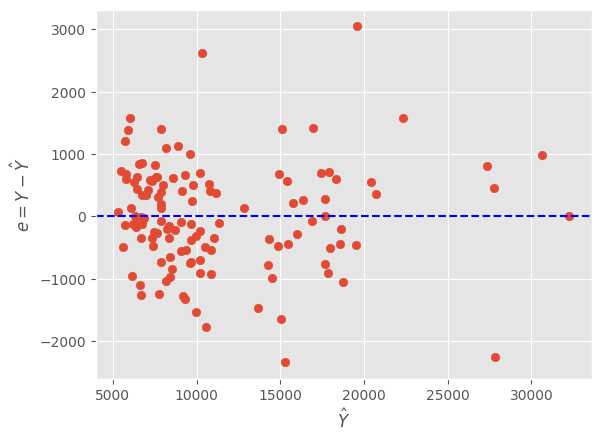

In [46]:
ajusted_values = computing_ajusted_values(X_train, model)
testing_plot_equal_variance(ajusted_values, model)

In [47]:
testing_Breusch_Pagan(model, lin_reg)

1. Accept the null hypothesis Hₒ = Homoscedasticity. 
P-value = 0.5744 > 0.05


In [48]:
computing_RMSE(y_test, model)

The RMSE is: 2885.75


In [49]:
computing_MAPE(y_test, model)

The MAPE is: 15.58
